In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ==============================
# Internship Assignment Notebook
# Author: Rohit
# ==============================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

# 2️⃣ Load Datasets
# Upload files manually to Colab or mount Google Drive

trader_df = pd.read_csv("/content/drive/MyDrive/ds_Rohit Parida/csv files/raw/historical_data.csv")
sentiment_df = pd.read_csv("/content/drive/MyDrive/ds_Rohit Parida/csv files/raw/fear_greed_index.csv")

print("Trader Data:")
print(trader_df.head())
print("\nSentiment Data:")
print(sentiment_df.head())


Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         

In [ ]:
print("Describing Trader_DataFrame: ",trader_df.describe())
print("Describnig Sentiment_DataFrame",sentiment_df.describe())

Describing Trader_DataFrame:         Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Timestamp  
count  211224.000000  2.112240e+05  211224.000000  2.112240e+05  2.112240e+05  
mean       48.749001  6.965388e+10       1.163967  5.628549e+14  1.737744e+12  
std       919.164828  1.835753e+10       6.758854  3.257565e+14  8.689920e+09  
min   -117990.10410

In [ ]:
# To know the data_type as well as the column_names  properly.
print(trader_df.info())
print(sentiment_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
# To get the idea of how many rows and columns each dataset has.
print(trader_df.shape)
print(sentiment_df.shape)

(211224, 16)
(2644, 4)


In [ ]:
# To check if any of the data contains any null values.
# print(trader_df.isnull().sum())
# print(sentiment_df.isnull().sum())

In [ ]:
# trader_df.duplicated().sum()
# sentiment_df.duplicated().sum()

In [ ]:
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])
sentiment_df["date"]

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05
...,...
2639,2025-04-28
2640,2025-04-29
2641,2025-04-30
2642,2025-05-01


In [ ]:
sentiment_df['classification'].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [ ]:
sentiment_df['classification'] = sentiment_df['classification'].replace('Extreme Fear', 'Fear')
sentiment_df['classification'] = sentiment_df['classification'].replace('Extreme Greed', 'Greed')
sentiment_df['classification'].value_counts()

,count
classification,
Fear,1289
Greed,959
Neutral,396


In [ ]:
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], unit='ms')
print(trader_df['Timestamp'])
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], unit = 's')
print(sentiment_df['timestamp'])

0        2024-10-27 03:33:20
1        2024-10-27 03:33:20
2        2024-10-27 03:33:20
3        2024-10-27 03:33:20
4        2024-10-27 03:33:20
                 ...        
211219   2025-06-15 15:06:40
211220   2025-06-15 15:06:40
211221   2025-06-15 15:06:40
211222   2025-06-15 15:06:40
211223   2025-06-15 15:06:40
Name: Timestamp, Length: 211224, dtype: datetime64[ns]
0       1970-01-18 13:31:03
1       1970-01-18 13:32:29
2       1970-01-18 13:33:55
3       1970-01-18 13:35:22
4       1970-01-18 13:36:48
               ...         
2639    1970-01-21 04:56:58
2640    1970-01-21 04:58:24
2641    1970-01-21 04:59:51
2642    1970-01-21 05:01:17
2643    1970-01-21 05:02:43
Name: timestamp, Length: 2644, dtype: object


In [ ]:
#Done to change the timestamp to the HH:MM:SS format.
# sentiment_df['timestamp'] = sentiment_df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
display(sentiment_df['timestamp'].head())

,timestamp
0,1970-01-18 13:31:03
1,1970-01-18 13:32:29
2,1970-01-18 13:33:55
3,1970-01-18 13:35:22
4,1970-01-18 13:36:48


In [ ]:
# Inspect for missing values in key columns
print("\nMissing values in key trader columns:")
print(trader_df[['Closed PnL', 'Size Tokens', 'Execution Price']].isnull().sum())

# Fill any missing PnL values with 0
trader_df['Closed PnL'].fillna(0, inplace=True)

# Ensure key columns are numeric (they already are, but this is good practice)
trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'])
trader_df['Size Tokens'] = pd.to_numeric(trader_df['Size Tokens'])
trader_df['Execution Price'] = pd.to_numeric(trader_df['Execution Price'])

print("\nTrader Data Info after cleaning:")
trader_df.info()


Missing values in key trader columns:
Closed PnL         0
Size Tokens        0
Execution Price    0
dtype: int64

Trader Data Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          21

/tmp/ipython-input-761090015.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trader_df['Closed PnL'].fillna(0, inplace=True)


In [ ]:
# 3️⃣ Data Cleaning & Preprocessing
# Convert datetime columns
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Extract date for merging
trader_df['date_only'] = trader_df['Timestamp'].dt.date
sentiment_df['date_only'] = sentiment_df['date'].dt.date

# Merge trader data with sentiment
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date_only','value', 'classification']],
    on='date_only',
    how='left'
)

print("\nMerged Dataset Shape:", merged_df.shape)
display(merged_df.head(5))


Merged Dataset Shape: (211224, 19)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,74.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,74.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,74.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,74.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,74.0,Greed


In [ ]:
merged_df['trade_value_usd'] = merged_df['Size Tokens'] * merged_df['Execution Price']
merged_df.drop(columns=['trade_value_usd','difference'],inplace=True)


In [ ]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,74.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,74.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,74.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,74.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,74.0,Greed


In [ ]:
def classify_outcome(pnl):
    if pnl > 0:
        return 'Win'
    elif pnl < 0:
        return 'Loss'
    else:
        return 'Breakeven'

merged_df['outcome'] = merged_df['Closed PnL'].apply(classify_outcome)

# Display the new features
print("Data head with new features:")
display(merged_df[['classification', 'Closed PnL', 'Size USD', 'outcome']].head())

Data head with new features:


,classification,Closed PnL,Size USD,outcome
0,Greed,0.0,7872.16,Breakeven
1,Greed,0.0,127.68,Breakeven
2,Greed,0.0,1150.63,Breakeven
3,Greed,0.0,1142.04,Breakeven
4,Greed,0.0,69.75,Breakeven



Average Profit/Loss by Market Sentiment:
classification
Greed      77.838247
Fear       50.047622
Neutral    22.229713
Name: Closed PnL, dtype: float64


/tmp/ipython-input-1168990239.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profitability_by_sentiment.index, y=profitability_by_sentiment.values, palette='viridis')


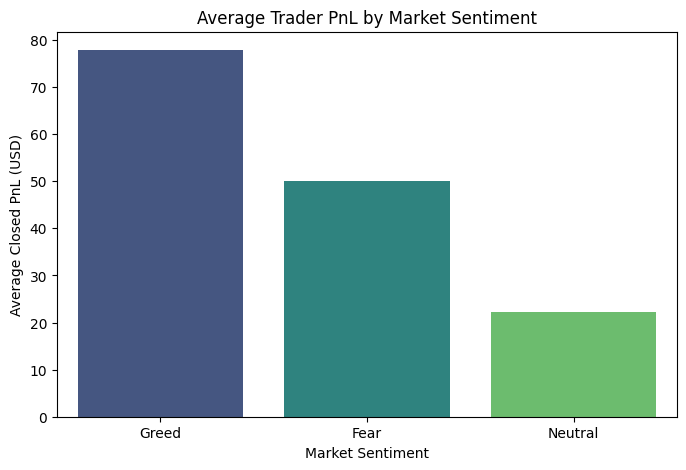

In [ ]:
profitability_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)

print("\nAverage Profit/Loss by Market Sentiment:")
print(profitability_by_sentiment)

# Visualize the results
plt.figure(figsize=(8, 5))
sns.barplot(x=profitability_by_sentiment.index, y=profitability_by_sentiment.values, palette='viridis')
plt.title('Average Trader PnL by Market Sentiment')
plt.ylabel('Average Closed PnL (USD)')
plt.xlabel('Market Sentiment')
plt.show()


Total Trading Volume by Market Sentiment:
classification
Fear       7.041585e+08
Greed      1.549104e+08
Neutral    2.184323e+07
Name: Size USD, dtype: float64


/tmp/ipython-input-967294786.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volume_by_sentiment.index, y=volume_by_sentiment.values, palette='plasma')


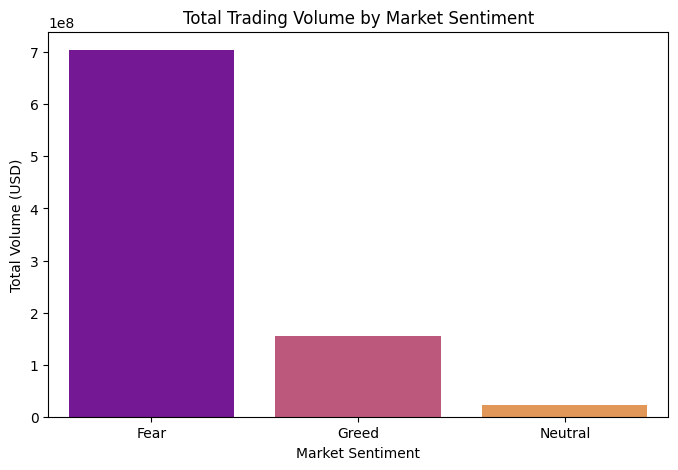

In [ ]:
# Group by sentiment and calculate the sum of trade volume
volume_by_sentiment = merged_df.groupby('classification')['Size USD'].sum().sort_values(ascending=False)

print("\nTotal Trading Volume by Market Sentiment:")
print(volume_by_sentiment)

# Visualize the results
plt.figure(figsize=(8, 5))
sns.barplot(x=volume_by_sentiment.index, y=volume_by_sentiment.values, palette='plasma')
plt.title('Total Trading Volume by Market Sentiment')
plt.ylabel('Total Volume (USD)')
plt.xlabel('Market Sentiment')
plt.show()


Proportion of Trade Outcomes by Sentiment:
outcome              Win      Loss  Breakeven
classification                               
Fear            0.415146  0.066930   0.517924
Greed           0.453492  0.087697   0.458810
Neutral         0.317182  0.076600   0.606218


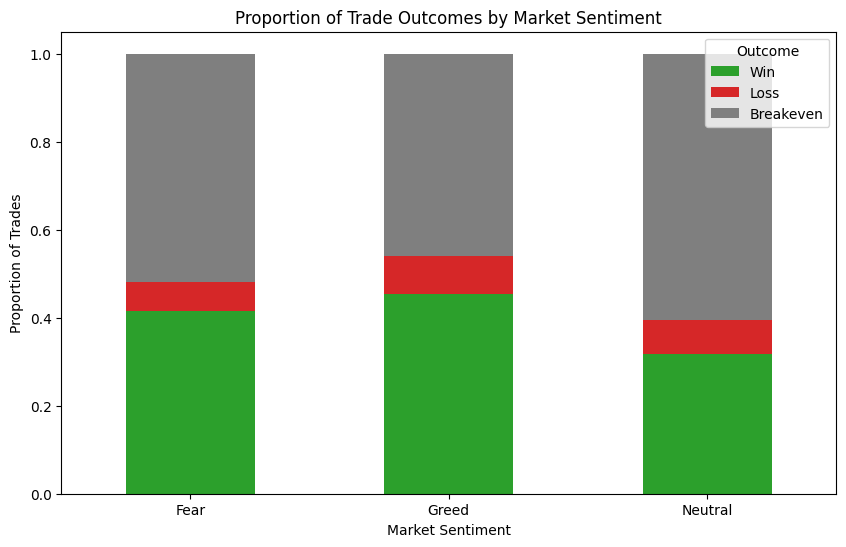

In [ ]:
# 1. Calculate the proportion of Wins, Losses, and Breakevens for each sentiment
win_loss_analysis = merged_df.groupby('classification')['outcome'].value_counts(normalize=True).unstack().fillna(0)

# Reorder columns for a more logical plot
if 'Win' in win_loss_analysis.columns and 'Loss' in win_loss_analysis.columns:
    win_loss_analysis = win_loss_analysis[['Win', 'Loss', 'Breakeven']]

print("\nProportion of Trade Outcomes by Sentiment:")
print(win_loss_analysis)


# 2. Visualize the results as a stacked bar chart
win_loss_analysis.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#2ca02c', '#d62728', '#7f7f7f'], # Green for Win, Red for Loss, Gray for Breakeven
    title='Proportion of Trade Outcomes by Market Sentiment'
)

plt.ylabel('Proportion of Trades')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.legend(title='Outcome')
plt.show()

In [ ]:
# This assumes you have already created 'win_loss_analysis' in the previous step
# It calculates the ratio by dividing the proportion of wins by the proportion of losses
win_loss_analysis['ratio (Win/Loss)'] = win_loss_analysis['Win'] / win_loss_analysis['Loss']

print("Final Win/Loss Ratio by Sentiment:")
print(win_loss_analysis['ratio (Win/Loss)'])

Final Win/Loss Ratio by Sentiment:
classification
Fear       6.202679
Greed      5.171105
Neutral    4.140768
Name: ratio (Win/Loss), dtype: float64



Average Position Size (USD) by Sentiment:
classification
Fear       5259.977837
Greed      3581.661513
Neutral    3058.848110
Name: Size USD, dtype: float64


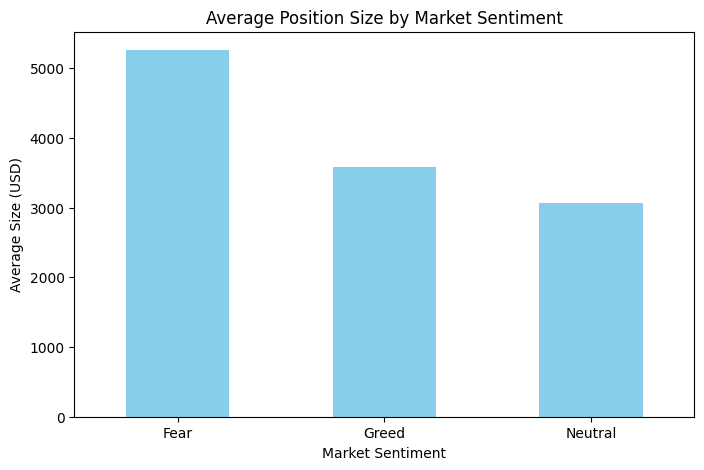

In [ ]:
# Group the data by sentiment and find the mean of the 'Size USD' column
avg_position_size = merged_df.groupby('classification')['Size USD'].mean().sort_values(ascending=False)

print("\nAverage Position Size (USD) by Sentiment:")
print(avg_position_size)

# --- Visualization ---
plt.figure(figsize=(8, 5))
avg_position_size.plot(
    kind='bar',
    title='Average Position Size by Market Sentiment',
    color='skyblue'
)
plt.ylabel('Average Size (USD)')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=0) # Keeps the x-axis labels horizontal
plt.show()


Total Cumulative PnL (USD) by Sentiment:
classification
Fear       6.699925e+06
Greed      3.366582e+06
Neutral    1.587424e+05
Name: Closed PnL, dtype: float64


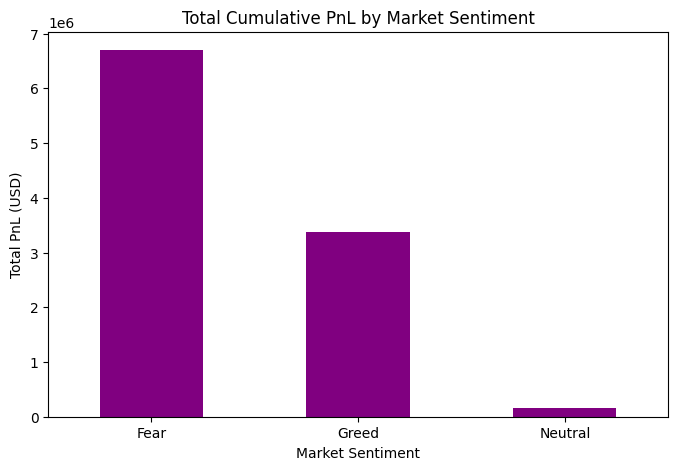

In [ ]:
# Group by sentiment and get the sum of 'Closed PnL'
total_pnl = merged_df.groupby('classification')['Closed PnL'].sum().sort_values(ascending=False)

print("\nTotal Cumulative PnL (USD) by Sentiment:")
print(total_pnl)

# --- Visualization ---
plt.figure(figsize=(8, 5))
total_pnl.plot(
    kind='bar',
    title='Total Cumulative PnL by Market Sentiment',
    color='purple'
)
plt.ylabel('Total PnL (USD)')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=0)
plt.show()


Total Number of Trades (Frequency) by Sentiment:
classification
Fear       133871
Greed       43251
Neutral      7141
dtype: int64


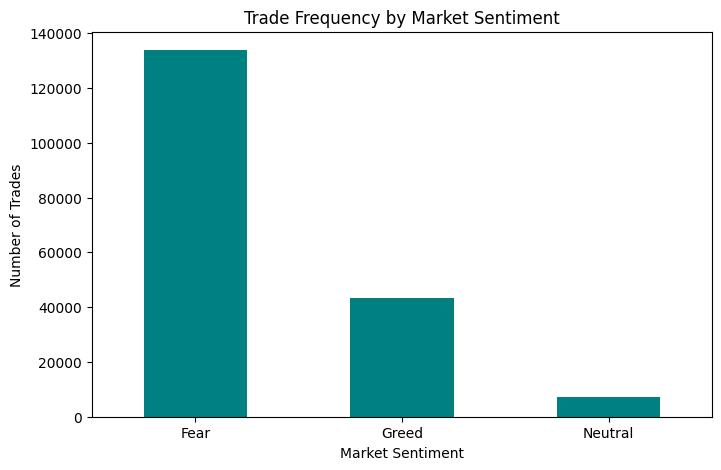

In [ ]:
# Group by sentiment and count the number of trades in each group
# .size() is a fast and efficient way to count rows in each group
trade_frequency = merged_df.groupby('classification').size().sort_values(ascending=False)

print("\nTotal Number of Trades (Frequency) by Sentiment:")
print(trade_frequency)

# --- Visualization ---
plt.figure(figsize=(8, 5))
trade_frequency.plot(
    kind='bar',
    title='Trade Frequency by Market Sentiment',
    color='teal'
)
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=0)
plt.show()

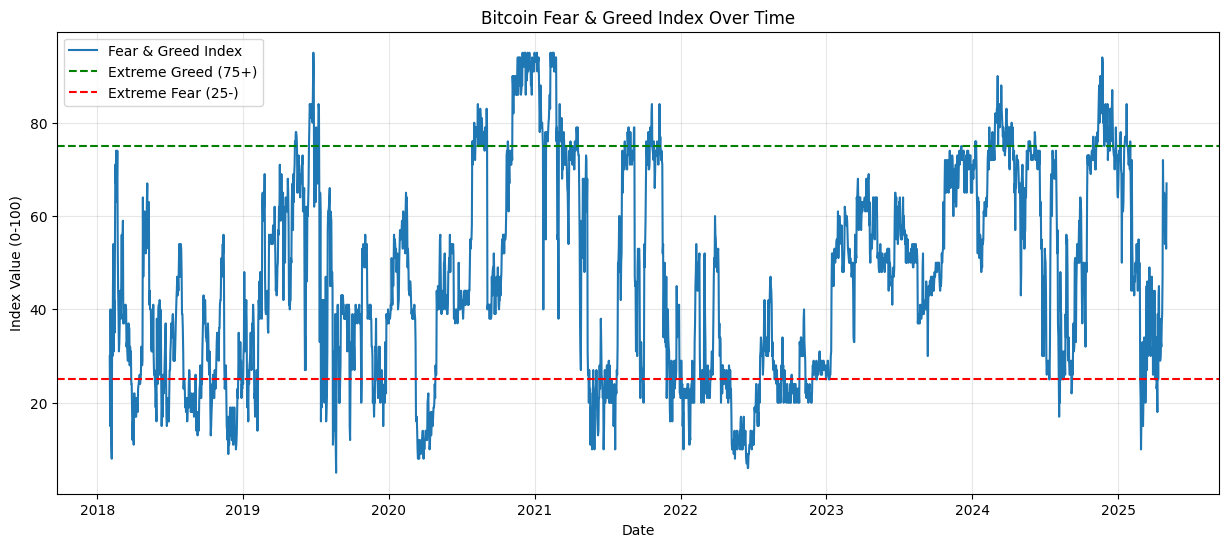

In [ ]:
# We use the original, cleaned sentiment_df for this
plt.figure(figsize=(15, 6))
plt.plot(sentiment_df['date'], sentiment_df['value'], label='Fear & Greed Index')

# Add lines to indicate extreme zones
plt.axhline(y=75, color='g', linestyle='--', label='Extreme Greed (75+)')
plt.axhline(y=25, color='r', linestyle='--', label='Extreme Fear (25-)')

plt.title('Bitcoin Fear & Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value (0-100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [74]:
merged_df.to_csv("merged_data.csv", index=False)